In [51]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

from compute_correlations import compute_pearson_correlation, compute_kendall_correlation
from graphs import build_full_graph, build_threshold_graph, find_max_clique, find_max_independent_set

# Отрисовка гистограм температуры

In [72]:
def load_temp_by_season_interval(season, interval):
    cities = ["msk", "spb", "kaz", "ufa", "nn", "novosib", "vlad"]
    df = pd.DataFrame(columns=cities)
    for city in cities:
        df[city] = pd.read_csv(f"result_datasets/{city}_df_{season}_{interval}.csv")["T"]
    return df

In [73]:
winter_df = load_temp_by_season_interval('winter', '3h')
spring_df = load_temp_by_season_interval('spring', '3h')
summer_df = load_temp_by_season_interval('summer', '3h')
autumn_df = load_temp_by_season_interval('autumn', '3h')

In [74]:
winter_df['Сезон'] = 'Зима'
spring_df['Сезон'] = 'Весна'
summer_df['Сезон'] = 'Лето'
autumn_df['Сезон'] = 'Осень' 

combined_df = pd.concat([winter_df, spring_df, summer_df, autumn_df])
melted_df = combined_df.melt(id_vars=['Сезон'], var_name='City', value_name='Temperature')

In [75]:
colors_by_season = {
    'Зима' : 'lightblue',
    'Весна' : 'pink',
    'Лето' : 'yellowgreen',
    'Осень': 'orange'
}

city_names = {
    'msk': 'Москва',
    'spb': 'Санкт-Петербург',
    'kaz': 'Казань',
    'ufa': 'Уфа',
    'nn': 'Нижний Новгород',
    'novosib': 'Новосибирск',
    'vlad': 'Владивосток'
}
melted_df['City'] = melted_df['City'].map(city_names)

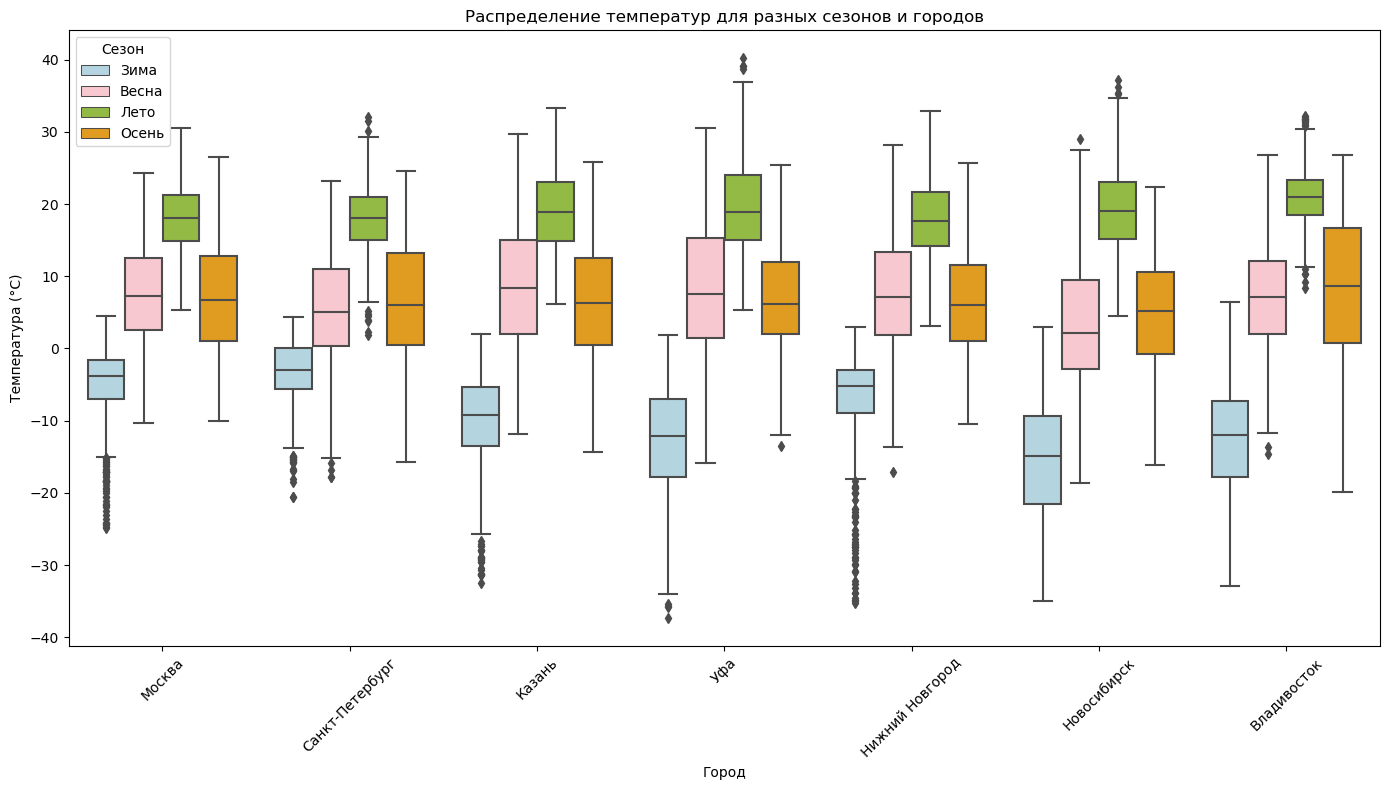

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_df, x='City', y='Temperature', hue='Сезон', palette=colors_by_season)

plt.title('Распределение температур для разных сезонов и городов')
plt.xlabel('Город')
plt.ylabel('Температура (°C)')
plt.legend(title='Сезон')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
# plt.savefig(f'boxplot_общий.png')

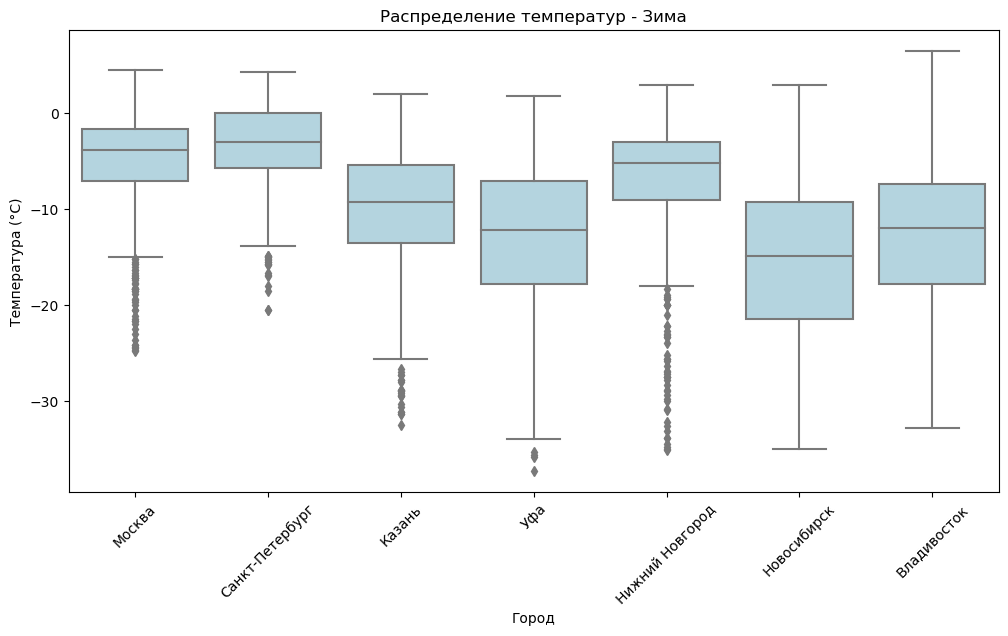

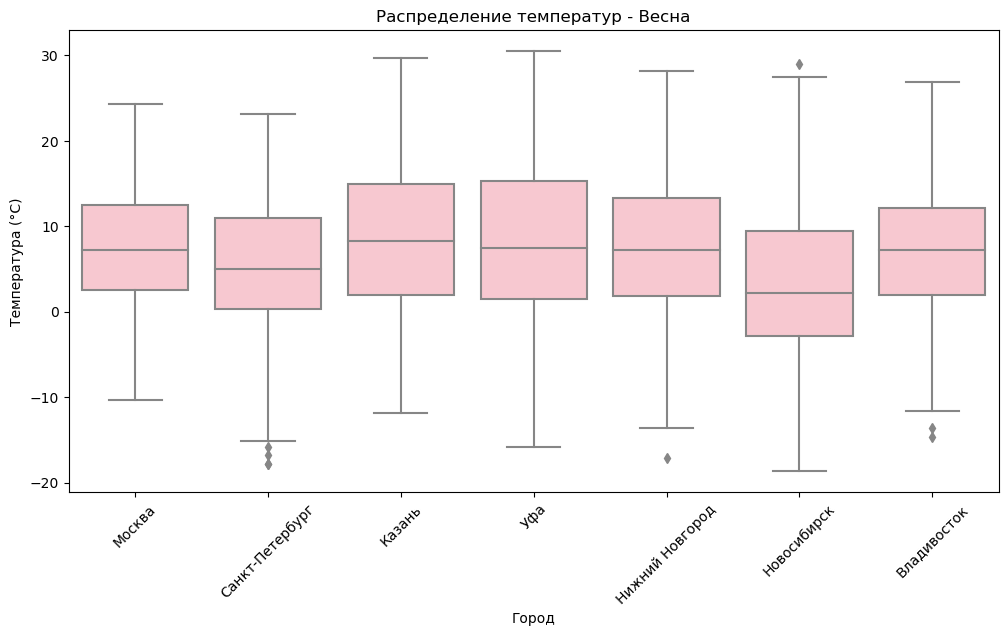

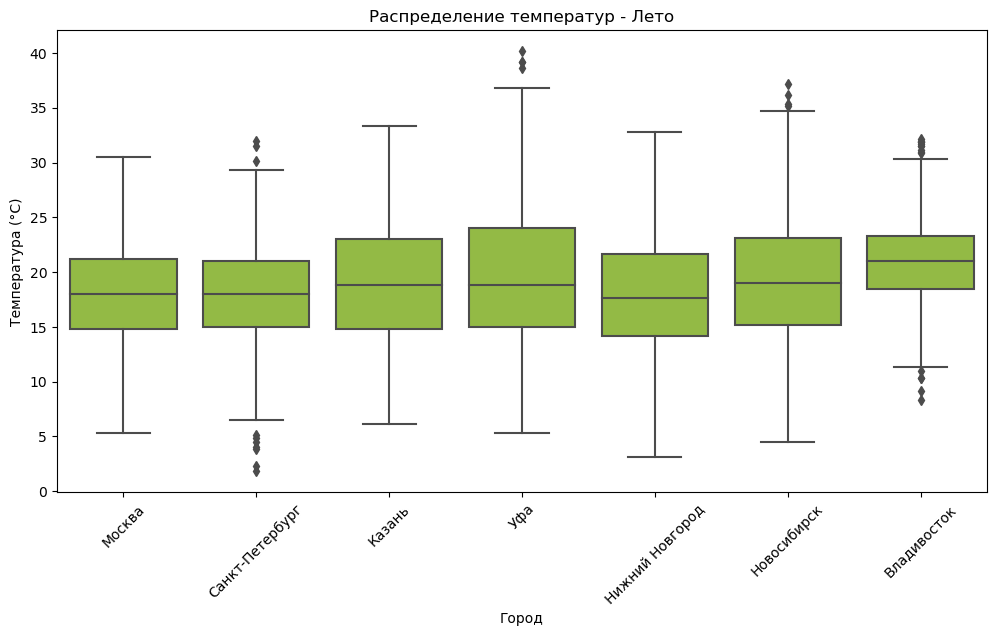

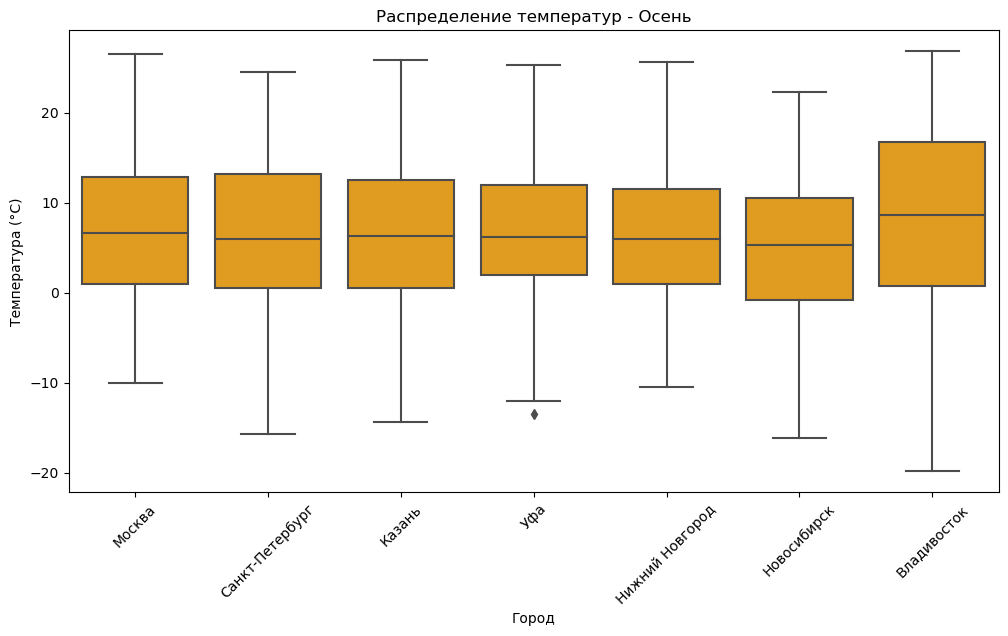

In [ ]:
for season, color in colors_by_season.items():

    plt.figure(figsize=(12, 6))
    season_data = melted_df[melted_df['Сезон'] == season]
    sns.boxplot(data=season_data, x='City', y='Temperature', color=color)
    
    plt.title(f'Распределение температур - {season}')
    plt.xlabel('Город')
    plt.ylabel('Температура (°C)')
    plt.xticks(rotation=45)
    
    plt.show()

    # plt.savefig(f'boxplot_{season.lower()}.png')
    # plt.close()